# Importing Necessary Libraries


In [397]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold , cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading the dataset


In [398]:
url = "https://raw.githubusercontent.com/ronydebnath/STDS-15/main/Dataset/heart_2020_cleaned.csv?token=GHSAT0AAAAAACHSU2OQOR67NPLGHE3UPBIIZIJGDTA"
df = pd.read_csv(url)

# General info about the dataset


In [399]:
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [400]:
df.shape

(319795, 18)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

There is no null object in our dataset

In [402]:
# checking the duplicate
df.duplicated().sum()

18078

In [403]:
# General description about our dataset
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [404]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

# Changing values(yes,no)into numeric values 0,1

In [405]:
df['AgeCategory'] = df['AgeCategory'].str[:2]

In [406]:
df=df.replace('No','0')
df= df.replace('Yes','1')
df=df.replace('Female','0')
df= df.replace('Male','1')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,Hispanic,0,0,Good,12.0,0,0,0


# changing general health into numeric values

In [407]:
df['GenHealth']=df['GenHealth'].replace('Poor','0')
df['GenHealth']=df['GenHealth'].replace('Fair','1')
df['GenHealth']=df['GenHealth'].replace('Good','2')
df['GenHealth']=df['GenHealth'].replace('Very good','3')
df['GenHealth']=df['GenHealth'].replace('Excellent','4')

In [408]:
df["Diabetic"]=df['Diabetic'].replace('No, borderline diabetes','3')
df["Diabetic"]=df['Diabetic'].replace('Yes (during pregnancy)','4')

In [409]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,Hispanic,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,Hispanic,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,Hispanic,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,Hispanic,0,0,2,12.0,0,0,0


In [410]:
x = df.drop(['HeartDisease','Race'],axis = 1)

In [411]:
y = df['HeartDisease']

In [412]:
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,55,1,1,3,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,80,0,1,3,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,65,1,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,75,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,40,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,60,1,0,1,6.0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,35,0,1,3,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,45,0,1,2,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,25,0,0,2,12.0,0,0,0


In [413]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float64
 1   Smoking           319795 non-null  object 
 2   AlcoholDrinking   319795 non-null  object 
 3   Stroke            319795 non-null  object 
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   DiffWalking       319795 non-null  object 
 7   Sex               319795 non-null  object 
 8   AgeCategory       319795 non-null  object 
 9   Diabetic          319795 non-null  object 
 10  PhysicalActivity  319795 non-null  object 
 11  GenHealth         319795 non-null  object 
 12  SleepTime         319795 non-null  float64
 13  Asthma            319795 non-null  object 
 14  KidneyDisease     319795 non-null  object 
 15  SkinCancer        319795 non-null  object 
dtypes: float64(4), objec

In [414]:
x=x.astype('float32')


In [415]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float32
 1   Smoking           319795 non-null  float32
 2   AlcoholDrinking   319795 non-null  float32
 3   Stroke            319795 non-null  float32
 4   PhysicalHealth    319795 non-null  float32
 5   MentalHealth      319795 non-null  float32
 6   DiffWalking       319795 non-null  float32
 7   Sex               319795 non-null  float32
 8   AgeCategory       319795 non-null  float32
 9   Diabetic          319795 non-null  float32
 10  PhysicalActivity  319795 non-null  float32
 11  GenHealth         319795 non-null  float32
 12  SleepTime         319795 non-null  float32
 13  Asthma            319795 non-null  float32
 14  KidneyDisease     319795 non-null  float32
 15  SkinCancer        319795 non-null  float32
dtypes: float32(16)
memor

In [416]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [417]:
y.value_counts()


0    292422
1     27373
Name: HeartDisease, dtype: int64

<AxesSubplot:ylabel='HeartDisease'>

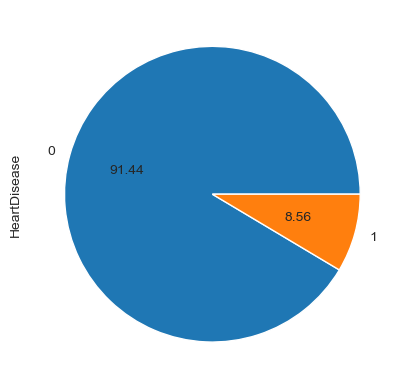

In [418]:
 y.value_counts().plot.pie(autopct = '%0.2f')


# 1. Prediction with imbalanced data

In [419]:
# Placeholders for accuracy values
decision_tree_accuracy_imbalanced = None
logistic_regression_accuracy_imbalanced = None
random_forest_accuracy_imbalanced = None
decision_tree_accuracy_balanced_under = None
logistic_regression_accuracy_balanced_under = None
random_forest_accuracy_balanced_under = None
decision_tree_accuracy_balanced_over = None
logistic_regression_accuracy_balanced_over = None
random_forest_accuracy_balanced_over = None

# Placeholders for recall values
decision_tree_recall_imbalanced = None
logistic_regression_recall_imbalanced = None
random_forest_recall_imbalanced = None
decision_tree_recall_balanced_under = None
logistic_regression_recall_balanced_under = None
random_forest_recall_balanced_under = None
decision_tree_recall_balanced_over = None
logistic_regression_recall_balanced_over = None
random_forest_recall_balanced_over = None

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Placeholders for recall values
decision_tree_recall_imbalanced = None
logistic_regression_recall_imbalanced = None
random_forest_recall_imbalanced = None
decision_tree_recall_balanced_under = None
logistic_regression_recall_balanced_under = None
random_forest_recall_balanced_under = None
decision_tree_recall_balanced_over = None
logistic_regression_recall_balanced_over = None
random_forest_recall_balanced_over = None


## 1.1 Decision Tree Classifier

In [421]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, max_features=4)
dt.fit(x_train, y_train)
dt.score(x_train, y_train)
decision_tree_accuracy_imbalanced = dt.score(x_test, y_test)
y_pred = dt.predict(x_test)



## Decision Tree Model Evaluation with imbalanced data

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58497
           1       0.54      0.06      0.10      5462

    accuracy                           0.92     63959
   macro avg       0.73      0.53      0.53     63959
weighted avg       0.89      0.92      0.88     63959



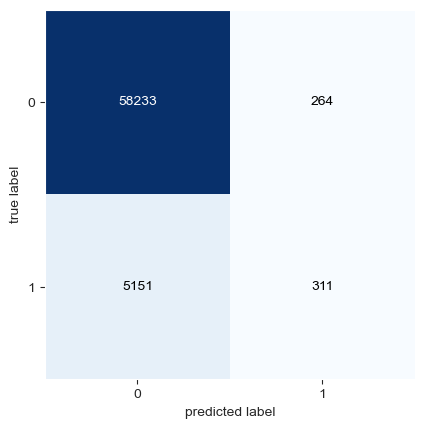

In [422]:
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)
print(classification_report(y_test, y_pred))
decision_tree_recall_imbalanced = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

# Decision Tree - cross validation

In [423]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(dt, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

[0.91415492 0.91473574 0.91589898]


91.49

---

## 1.2 Logistic regression

In [424]:
from sklearn.linear_model import LogisticRegression

LOG = LogisticRegression().fit(x_train, y_train)

LOG.score(x_train, y_train)

logistic_regression_accuracy_imbalanced = LOG.score(x_test, y_test)

y_pred = LOG.predict(x_test)


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic regression Model Evaluation with imbalanced data

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58497
           1       0.50      0.14      0.21      5462

    accuracy                           0.91     63959
   macro avg       0.71      0.56      0.58     63959
weighted avg       0.89      0.91      0.89     63959



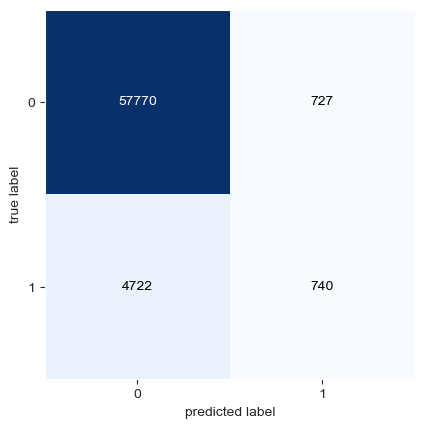

In [425]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
logistic_regression_recall_imbalanced = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Logistic regression - cross validation

In [426]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(LOG, x, y, cv=K_fold, scoring=scoring)
print(score)

round(np.mean(score) * 100, 2)

/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[0.91407987 0.91527046 0.91601156]


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


91.51

---


## 1.3 Random Forest Classifier

In [427]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4, max_depth=3, max_features=4)

rf.fit(x_train, y_train)

rf.score(x_train, y_train)

random_forest_accuracy_imbalanced = rf.score(x_test, y_test)

y_pred = rf.predict(x_test)

# Random Forest Classifier Model Evaluation with imbalanced data

/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.96     58497
           1       0.00      0.00      0.00      5462

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.84      0.91      0.87     63959



/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


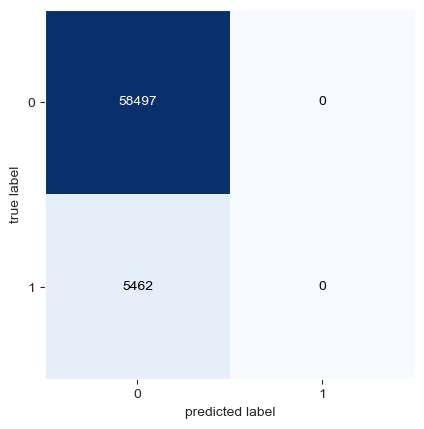

In [428]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
random_forest_recall_imbalanced = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

# Random Forest Classifier - Cross validation

In [429]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(rf, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

[0.91344196 0.91457626 0.91519541]


91.44

---

# 2. Prediction with balanced data
### Addressing the issue of imbalanced datasets using random under-sampling

In [430]:
# Importing necessary libraries
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

In [431]:
# Initializing RandomUnderSampler
RUS = RandomUnderSampler(sampling_strategy=1)

In [432]:
# Performing under-sampling on the training data
x_res , y_res = RUS.fit_resample(x_train,y_train)

<AxesSubplot:ylabel='HeartDisease'>

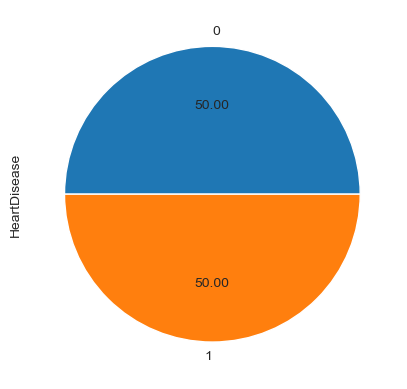

In [433]:
# Visualizing the class distribution using a pie chart
y_res.value_counts().plot.pie(autopct='%.2f')

In [434]:
# Displaying the value counts of the resampled target variable
y_res.value_counts()

0    21911
1    21911
Name: HeartDisease, dtype: int64

In [435]:
# Displaying the resampled feature data
x_res

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
92222,32.779999,0.0,0.0,0.0,0.0,0.0,0.0,1.0,65.0,0.0,1.0,3.0,7.0,1.0,0.0,1.0
268813,45.980000,1.0,0.0,0.0,30.0,30.0,1.0,0.0,60.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0
296740,27.440001,1.0,0.0,0.0,3.0,3.0,0.0,0.0,50.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
258723,24.330000,0.0,0.0,0.0,2.0,0.0,0.0,1.0,65.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0
102946,36.259998,0.0,0.0,0.0,0.0,2.0,0.0,1.0,65.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189650,18.650000,1.0,0.0,0.0,8.0,0.0,1.0,1.0,60.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0
209121,30.540001,1.0,0.0,0.0,6.0,0.0,0.0,1.0,75.0,0.0,0.0,2.0,9.0,0.0,0.0,0.0
54746,31.750000,0.0,0.0,0.0,0.0,30.0,1.0,0.0,75.0,1.0,1.0,2.0,8.0,0.0,0.0,0.0
86407,30.270000,0.0,0.0,0.0,14.0,0.0,0.0,1.0,70.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0


# 2.1 Decision tree classifier

In [436]:
from sklearn.tree import DecisionTreeClassifier

In [437]:
dt = DecisionTreeClassifier(max_depth = 5 , max_features= 4)

In [438]:
dt.fit(x_res,y_res)

DecisionTreeClassifier(max_depth=5, max_features=4)

In [439]:
dt.score(x_res,y_res)

0.7329423577198667

In [440]:
decision_tree_accuracy_balanced_under = dt.score(x_test,y_test)

In [441]:
y_pred = dt.predict(x_test)

## Decision Tree Model Evaluation with Random Under-Sampled data

In [442]:
con = confusion_matrix(y_test , y_pred)
con

array([[42608, 15889],
       [ 1401,  4061]])

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

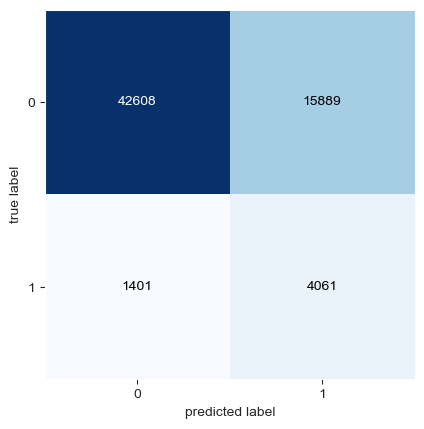

In [443]:
plot_confusion_matrix(con )

In [444]:
print (classification_report(y_test , y_pred))
decision_tree_recall_balanced_under = classification_report(y_test, y_pred, output_dict=True)['1']['recall']


              precision    recall  f1-score   support

           0       0.97      0.73      0.83     58497
           1       0.20      0.74      0.32      5462

    accuracy                           0.73     63959
   macro avg       0.59      0.74      0.58     63959
weighted avg       0.90      0.73      0.79     63959



## Cross validation of Decision Tree

In [445]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(dt , x,y , cv = K_fold , scoring= scoring)
print (score)

[0.91389225 0.91505469 0.91525169]


In [446]:
round(np.mean(score)*100 , 2)


91.47

# 2.2 Logistic Regression classifier

In [447]:
from sklearn.linear_model import LogisticRegression

LOG = LogisticRegression().fit(x_res, y_res)

LOG.score(x_res, y_res)

logistic_regression_accuracy_balanced_under = LOG.score(x_test, y_test)

y_pred = LOG.predict(x_test)

/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression Model Evaluation with Random Under-Sampled data

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     58497
           1       0.22      0.77      0.35      5462

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



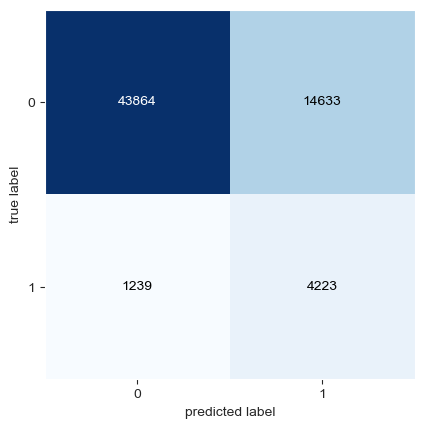

In [448]:
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
logistic_regression_recall_balanced_under = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Logistic Regression - Cross validation

In [449]:
K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(LOG, x, y, cv=K_fold, scoring=scoring)
print(score)

round(np.mean(score) * 100, 2)

/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[0.91407987 0.91527046 0.91601156]


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


91.51

---

# 2.3 Random Forest classifier

In [450]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4, max_depth=3, max_features=4)

rf.fit(x_res, y_res)

rf.score(x_res, y_res)

random_forest_accuracy_balanced_under = rf.score(x_test, y_test)

y_pred = rf.predict(x_test)


## Random Forest Classifier Model Evaluation with Random Under-Sampled data

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     58497
           1       0.20      0.76      0.32      5462

    accuracy                           0.73     63959
   macro avg       0.59      0.74      0.58     63959
weighted avg       0.90      0.73      0.79     63959



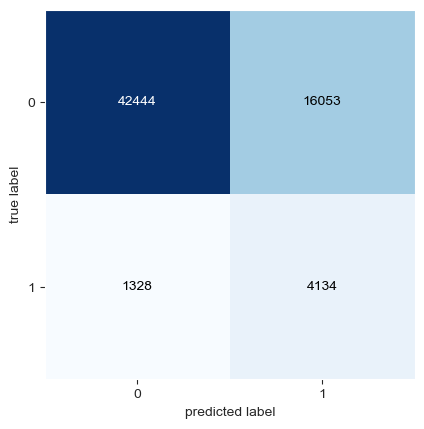

In [451]:
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
random_forest_recall_balanced_under = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Cross validation of Random Forest Classifier

In [452]:
K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(rf, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

[0.91376092 0.91457626 0.91519541]


91.45

# 3. Prediction with balanced data
### Addressing the issue of imbalanced datasets using Random Over-Sampling Technique

In [453]:
from imblearn.over_sampling import RandomOverSampler

In [454]:
ROS = RandomOverSampler(sampling_strategy = 1)

In [455]:
x_res, y_res = ROS.fit_resample(x_train,y_train)

<AxesSubplot:ylabel='HeartDisease'>

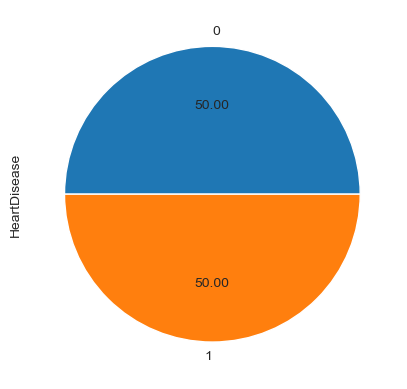

In [456]:
y_res.value_counts().plot.pie(autopct = "%.2f")


In [457]:
y_res.value_counts()


0    233925
1    233925
Name: HeartDisease, dtype: int64

# 3.1 Decision tree classifier

In [458]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, max_features=4)
dt.fit(x_res, y_res)
dt.score(x_res, y_res)
decision_tree_accuracy_balanced_over = dt.score(x_test, y_test)
y_pred = dt.predict(x_test)

## Decision Tree Model Evaluation with Random Over-Sampled data

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     58497
           1       0.20      0.81      0.32      5462

    accuracy                           0.70     63959
   macro avg       0.59      0.75      0.56     63959
weighted avg       0.91      0.70      0.77     63959



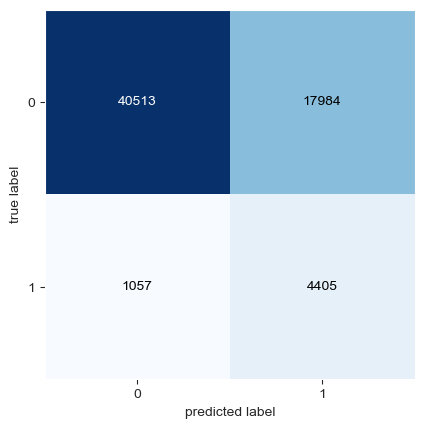

In [459]:
## Decision Tree Model Evaluation with Random Under-sampled data
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)
print(classification_report(y_test, y_pred))

decision_tree_recall_balanced_over = classification_report(y_test, y_pred, output_dict=True)['1']['recall']


## Cross validation of Decision Tree Model

In [460]:
## Cross validation of Decision Tree
K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(dt, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

[0.91409863 0.91547684 0.91525169]


91.49

---

# 3.2 Logistic Regression classifier


In [461]:
# 3.2 Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

LOG = LogisticRegression().fit(x_res, y_res)

LOG.score(x_res, y_res)

logistic_regression_accuracy_balanced_over = LOG.score(x_test, y_test)

y_pred = LOG.predict(x_test)

/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression Model Evaluation with Random Over-Sampled data


              precision    recall  f1-score   support

           0       0.97      0.75      0.85     58497
           1       0.22      0.78      0.35      5462

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



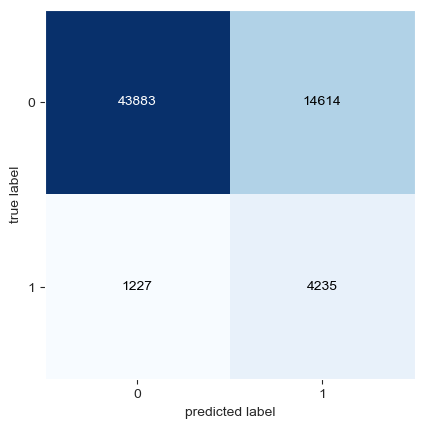

In [462]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
logistic_regression_recall_balanced_over = classification_report(y_test, y_pred, output_dict=True)['1']['recall']


## Cross validation of Logistic Regression Model

In [463]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(LOG, x, y, cv=K_fold, scoring=scoring)
print(score)

round(np.mean(score) * 100, 2)


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[0.91407987 0.91527046 0.91601156]


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


91.51

# 3.3 Random Forest classifier

In [464]:

# 3.3 Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4, max_depth=3, max_features=4)

rf.fit(x_res, y_res)

rf.score(x_res, y_res)

random_forest_accuracy_balanced_over = rf.score(x_test, y_test)

y_pred = rf.predict(x_test)

## Random Forest Classifier Model Evaluation with Random Over-Sampled data


              precision    recall  f1-score   support

           0       0.97      0.73      0.83     58497
           1       0.21      0.75      0.33      5462

    accuracy                           0.73     63959
   macro avg       0.59      0.74      0.58     63959
weighted avg       0.90      0.73      0.79     63959



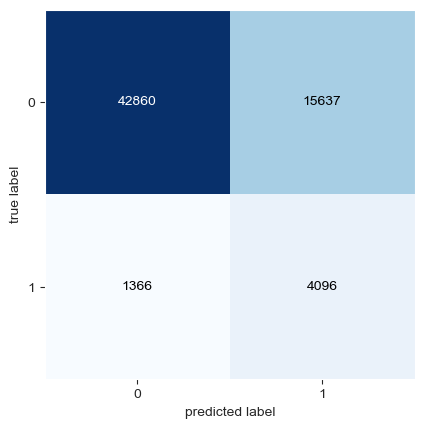

In [465]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
random_forest_recall_balanced_over = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Cross validation of Random Forest Classifier

In [466]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(rf, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

[0.91344196 0.91457626 0.91519541]


91.44

---

# Performance Evaluation

In [467]:
import pandas as pd

# Creating a dictionary for the data
data = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest'],
    'Imbalanced Accuracy': [decision_tree_accuracy_imbalanced, logistic_regression_accuracy_imbalanced, random_forest_accuracy_imbalanced],
    'Balanced (Under) Accuracy': [decision_tree_accuracy_balanced_under, logistic_regression_accuracy_balanced_under, random_forest_accuracy_balanced_under],
    'Balanced (Over) Accuracy': [decision_tree_accuracy_balanced_over, logistic_regression_accuracy_balanced_over, random_forest_accuracy_balanced_over],
    'Imbalanced Recall': [decision_tree_recall_imbalanced, logistic_regression_recall_imbalanced, random_forest_recall_imbalanced],
    'Balanced (Under) Recall': [decision_tree_recall_balanced_under, logistic_regression_recall_balanced_under, random_forest_recall_balanced_under],
    'Balanced (Over) Recall': [decision_tree_recall_balanced_over, logistic_regression_recall_balanced_over, random_forest_recall_balanced_over]
}

# Creating pandas DataFrames
accuracy_df = pd.DataFrame(data, columns=['Model', 'Imbalanced Accuracy', 'Balanced (Under) Accuracy', 'Balanced (Over) Accuracy'])
recall_df = pd.DataFrame(data, columns=['Model', 'Imbalanced Recall', 'Balanced (Under) Recall', 'Balanced (Over) Recall'])

# Displaying the tables
print("Accuracy Table:")
print(accuracy_df)
print("\n\n")
print("Recall Table:")
print(recall_df)


Accuracy Table:
                 Model  Imbalanced Accuracy  Balanced (Under) Accuracy  \
0        Decision Tree             0.915336                   0.729671   
1  Logistic Regression             0.914805                   0.751841   
2        Random Forest             0.914602                   0.728248   

   Balanced (Over) Accuracy  
0                  0.702294  
1                  0.752326  
2                  0.734158  



Recall Table:
                 Model  Imbalanced Recall  Balanced (Under) Recall  \
0        Decision Tree           0.056939                 0.743501   
1  Logistic Regression           0.135482                 0.773160   
2        Random Forest           0.000000                 0.756866   

   Balanced (Over) Recall  
0                0.806481  
1                0.775357  
2                0.749908  


# Visualising the performance Based on Accuracy

In [468]:
# Define a function for visualizing the performance
def visualize_performance(title, data_labels, values, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=data_labels, y=values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

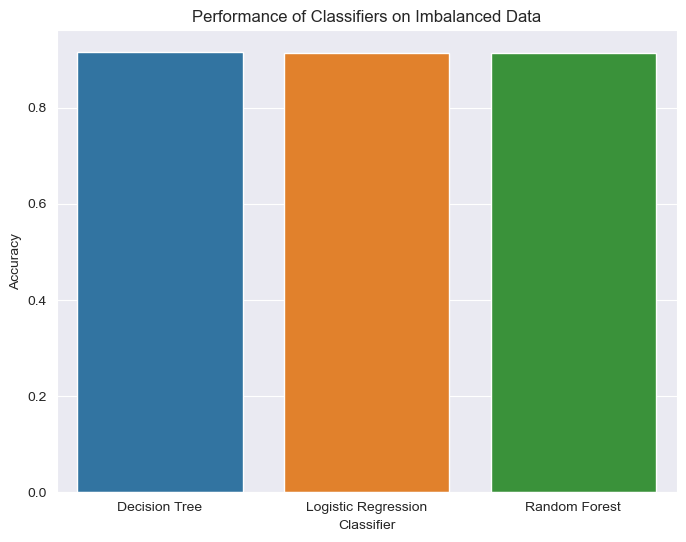

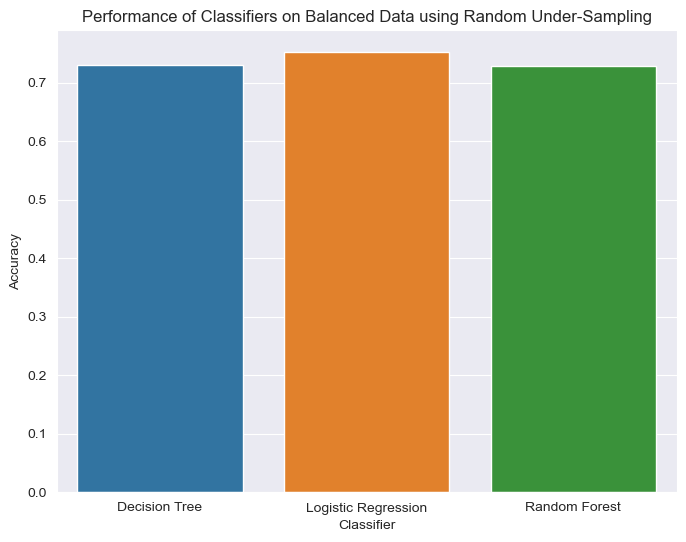

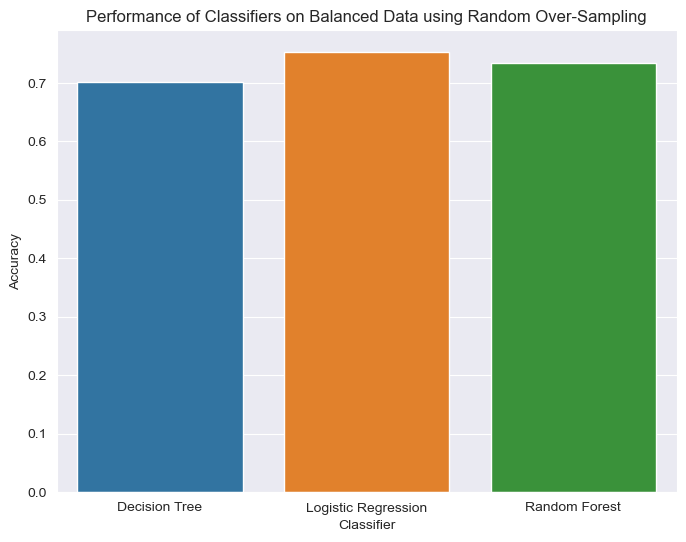

In [469]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the performance of the classifiers
imbalanced_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
imbalanced_values = [decision_tree_accuracy_imbalanced, logistic_regression_accuracy_imbalanced, random_forest_accuracy_imbalanced]
visualize_performance("Performance of Classifiers on Imbalanced Data", imbalanced_data_labels, imbalanced_values, "Classifier", "Accuracy")

balanced_under_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_under_sampling_values = [decision_tree_accuracy_balanced_under, logistic_regression_accuracy_balanced_under, random_forest_accuracy_balanced_under]
visualize_performance("Performance of Classifiers on Balanced Data using Random Under-Sampling", balanced_under_sampling_data_labels, balanced_under_sampling_values, "Classifier", "Accuracy")

balanced_over_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_over_sampling_values = [decision_tree_accuracy_balanced_over, logistic_regression_accuracy_balanced_over, random_forest_accuracy_balanced_over]
visualize_performance("Performance of Classifiers on Balanced Data using Random Over-Sampling", balanced_over_sampling_data_labels, balanced_over_sampling_values, "Classifier", "Accuracy")


---

# Visualising the performance Based on Recall Value

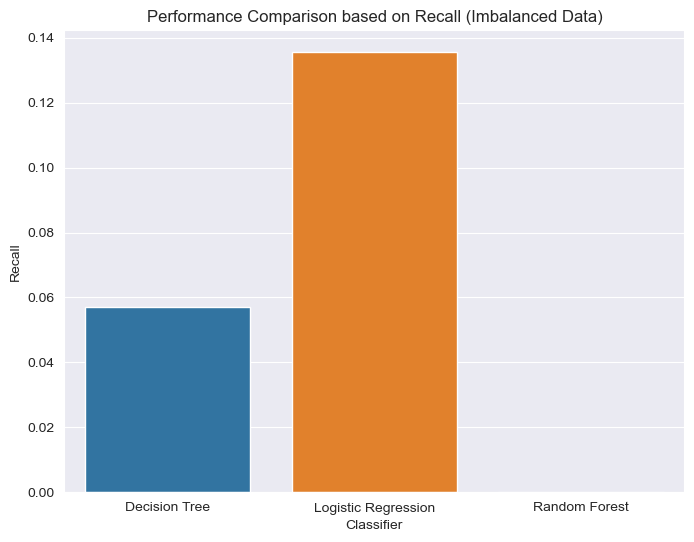

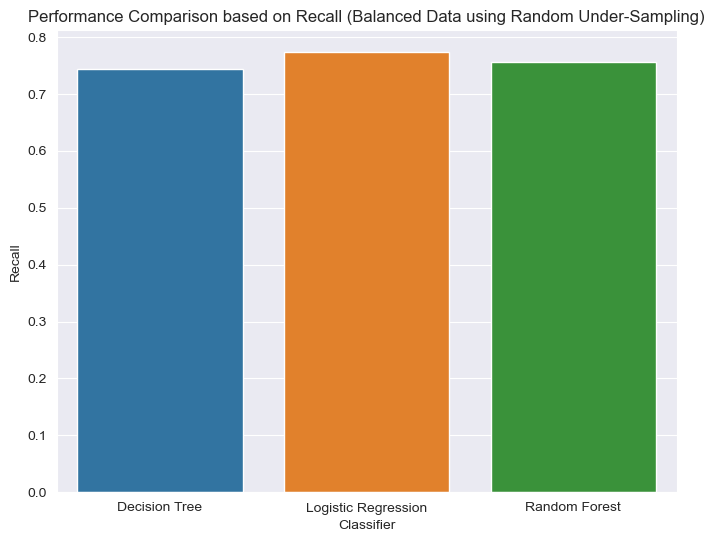

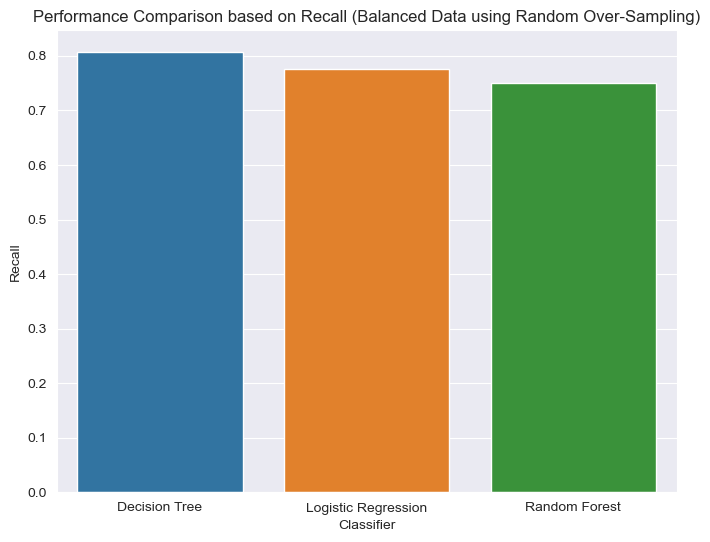

In [470]:

# Define a function for visualizing the performance based on recall
def visualize_recall_performance(title, data_labels, values, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=data_labels, y=values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Visualizing the performance of the classifiers based on recall
imbalanced_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
imbalanced_values = [decision_tree_recall_imbalanced, logistic_regression_recall_imbalanced, random_forest_recall_imbalanced]
visualize_recall_performance("Performance Comparison based on Recall (Imbalanced Data)", imbalanced_data_labels, imbalanced_values, "Classifier", "Recall")

balanced_under_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_under_sampling_values = [decision_tree_recall_balanced_under, logistic_regression_recall_balanced_under, random_forest_recall_balanced_under]
visualize_recall_performance("Performance Comparison based on Recall (Balanced Data using Random Under-Sampling)", balanced_under_sampling_data_labels, balanced_under_sampling_values, "Classifier", "Recall")

balanced_over_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_over_sampling_values = [decision_tree_recall_balanced_over, logistic_regression_recall_balanced_over, random_forest_recall_balanced_over]
visualize_recall_performance("Performance Comparison based on Recall (Balanced Data using Random Over-Sampling)", balanced_over_sampling_data_labels, balanced_over_sampling_values, "Classifier", "Recall")

# Standard scalar


In [471]:
# Standardization of numeric data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_res)

X_train_scaled = scaler.transform(x_res)
X_test_scaled = scaler.transform(x_test)

X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=x_res.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=x_test.columns)
X_test_scaled.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000
mean,-0.073576,-0.152352,0.060146,-0.186933,-0.197427,-0.031558,-0.239784,-0.101720,-0.368767,-0.131937,0.138080,0.325083,-0.017199,-0.053569,-0.148686,-0.116739
std,0.985786,0.985024,1.108868,0.661871,0.803644,0.939609,0.807821,1.000427,1.055762,0.962005,0.922295,0.916049,0.899222,0.946171,0.710869,0.856865
min,-2.588652,-0.978385,-0.242567,-0.318615,-0.538799,-0.495897,-0.563868,-1.055025,-2.380454,-0.476758,-1.578431,-1.950676,-3.817820,-0.427311,-0.288356,-0.391996
25%,-0.738889,-0.978385,-0.242567,-0.318615,-0.538799,-0.495897,-0.563868,-1.055025,-1.092561,-0.476758,0.633541,-0.195573,-0.697756,-0.427311,-0.288356,-0.391996
50%,-0.229624,-0.978385,-0.242567,-0.318615,-0.538799,-0.495897,-0.563868,-1.055025,-0.214452,-0.476758,0.633541,0.681979,-0.073744,-0.427311,-0.288356,-0.391996
75%,0.389543,1.022093,-0.242567,-0.318615,-0.337510,-0.143971,-0.563868,0.947845,0.370955,-0.476758,0.633541,0.681979,0.550269,-0.427311,-0.288356,-0.391996
max,10.223468,1.022093,4.122574,3.138584,2.480538,3.023368,1.773466,0.947845,1.249064,5.559975,0.633541,1.559530,10.534471,2.340213,3.467937,2.551044
